# Esercitazione 6: Ising 1D


Simulo un modello di Ising 1D 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

Andando a calcolare le quantità

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

per $T\in[0.5,2]$, ottenute campionando la distribuzione di prbabilità di Maxwell-Boltzmann $p(\{ s_i\})=e^{-\beta H}$ all'equilibrio termodinamico.

Inizialmente ho aggiornato il codice aggiungendo la possibilità di partire da una precedente configurazione e la possibilità di equilibrare il sistema. 
Per campionare la distribuzione di probabilità ho usato gli algoritmi di Metropolis e di Gibbs. Nell'algoritmo di Gibbs ad ogni passo uno spin $k$ viene scelto causalmente tra le due possibilità $[-1,+1]$ con probabilità

$$
p(s'_k|\{s_j:j\neq k\})=\frac{p(\{s_1,..,s'_k,..,s_N\})}{p(\{s_1,..,s'_k=+1,..,s_N\})+p(\{s_1,..,s'_k=-1,..,s_N\})}
$$

$$
p(s'_k=\pm|\{s_j:j\neq k\})=\frac{1}{1+exp\bigl( \mp 2\beta J\sum\limits_{\substack{i \: n.n \: to\: k}}  \mp 2h\beta\bigr)}
$$

Le incertezze sono state ottenute con la statistica a blocchi usando 
- $n_{blocks}=100$ blocchi
- $n_{steps} =5000$ passi per blocco

In [186]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt

La fase di equilibrazione è ottenuta usando $N=300$ passi in entrambi i casi 
- campo magnetico esterno $h=0$
- campo magnetico esterno $h=0.02$

partendo da due diverse configurazioni iniziali, rispettivamente di temperatura infinita (tutti gli spin sono disposti inizialmente in modo casuale) e temperatura nulla (tutti gli spin allineati).

Si è scelto poi di usare la configurazione equilibrata alla temperatura iniziale di $T=0.5$ ottenuta dalla configurazione a temperatura infinita

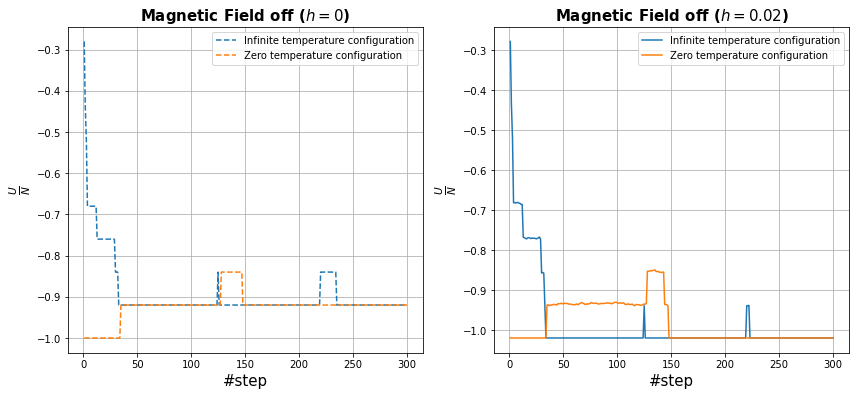

In [193]:
file=open('outputMetropolis/H_field_off/Equilib_HighT.ene')
E_H_off=np.loadtxt(file)
x_H_off=np.linspace(1,len(E_H_off),len(E_H_off))

file=open('outputMetropolis/H_field_off/Equilib_LowT.ene')
E_L_off=np.loadtxt(file)

file=open('outputMetropolis/H_field_on/Equilib_HighT.ene')
E_H_on=np.loadtxt(file)
x_H_on=np.linspace(1,len(E_H_on),len(E_H_on))

file=open('outputMetropolis/H_field_on/Equilib_LowT.ene')
E_L_on=np.loadtxt(file)

fig.suptitle('Equilibration', fontsize=20, fontweight='bold')
fig, ax=plt.subplots(1,2,figsize=(14,6))
ax[0].plot(x_H_off,E_H_off,ls='--', label='Infinite temperature configuration')
ax[0].plot(x_H_off,E_L_off,ls='--',label='Zero temperature configuration')
ax[0].legend()
ax[0].set_xlabel('#step', fontsize=15)
ax[0].set_ylabel(r'$\frac{U}{N}$', fontsize=15)
ax[0].set_title('Magnetic Field off ($h=0$)', fontsize=15, fontweight='bold')
#plt.axhline(-0.46187, color='r')
ax[0].grid(True)

ax[1].plot(x_H_on,E_H_on,label='Infinite temperature configuration')
ax[1].plot(x_H_on,E_L_on,label='Zero temperature configuration')
ax[1].legend()
ax[1].set_xlabel('#step', fontsize=15)
ax[1].set_ylabel(r'$\frac{U}{N}$', fontsize=15)
ax[1].set_title('Magnetic Field off ($h=0.02$)', fontsize=15, fontweight='bold')
#plt.axhline(-0.46187, color='r')
ax[1].grid(True)
plt.show()

Si osserva come entrambe le configurazioni raggiungono l'equilibrio termodinamico.
Nel caso di campo magnetico attivato, il sistema raggiunge l'equilibrio termodinamico, ma ci si può facilmente rendere conto che non è quello giusto. È infatti il ground state, che si dovrebbe avere solo nel caso a temperatura nulla. Mi aspetto quindi che questo possa portare ad un discostamente dal valore teorico

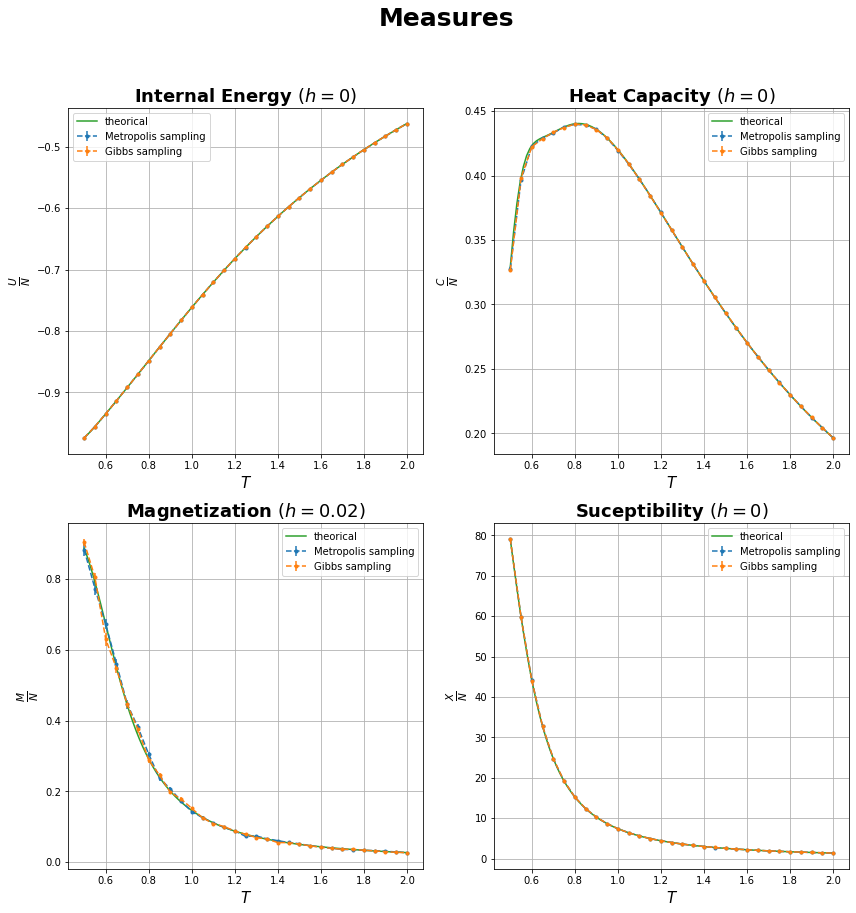

In [194]:
cartellaM="outputMetropolis/H_field_off/"
cartellaG="outputGibbs/H_field_off/"


#ENERGY
file=open(cartellaM+'/output.E_final.dat')
T_m,E_m,err_E_m=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

file=open(cartellaG+'output.E_final.dat')
T_g,E_g,err_E_g=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

#HEAT CAPACITY
file=open(cartellaM+'output.Heat_final.dat')
T_m,C_m,err_C_m=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

file=open(cartellaG+'output.Heat_final.dat')
T_g,C_g,err_C_g=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

#SUSCEPTIBILITY
file=open(cartellaM+'output.X_final.dat')
T_m,X_m,err_X_m=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

file=open(cartellaG+'output.X_final.dat')
T_g,X_g,err_X_g=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)


#MAGNETIZATION
cartellaM="outputMetropolis/H_field_on/"
cartellaG="outputGibbs/H_field_on/"

file=open(cartellaM+'output.M_final.dat')
T_m,M_m,err_M_m=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

file=open(cartellaG+'output.M_final.dat')
T_g,M_g,err_M_g=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)


#TERORICAL OBSERVABLES
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#energy
e = -J*( th + ch*thN )/( 1 + thN )

#heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#susceptibility
x = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#magnetization
h=0.02 #external field
b=1./T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
m = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

measures_m=[E_m, C_m, M_m, X_m]
measures_g=[E_g, C_g, M_g, X_g]
errors_m=[err_E_m, err_C_m,err_M_m, err_X_m]
errors_g=[err_E_g, err_C_g,err_M_g, err_X_g]
theoricals=[e,heat,m,x]
y_labels=[r'$\frac{U}{N}$',r'$\frac{C}{N}$',r'$\frac{M}{N}$',r'$\frac{X}{N}$']
titles=[r'Internal Energy $(h=0)$', r'Heat Capacity $(h=0)$', r'Magnetization $(h=0.02)$', r'Suceptibility $(h=0)$']
#PLOTS
fig, axes=plt.subplots(2, 2, figsize=(14,14))
fig.suptitle('Measures' ,fontsize=25, fontweight='bold')
for i in range(2):
    for j in range(2):
        ax=axes[i][j]
        
        if(i==1): k=j+1
        else:k=j
        ax.errorbar(T_m,measures_m[i+k],yerr=errors_m[i+k],fmt='.--', label='Metropolis sampling')
        ax.errorbar(T_g,measures_g[i+k],yerr=errors_g[i+k],fmt='.--', label='Gibbs sampling')
        ax.plot(T, theoricals[i+k], label='theorical')
        ax.legend()
        ax.set_title(titles[i+k], fontsize=18, fontweight='bold')
        ax.set_xlabel(r'$T$', fontsize=15)
        ax.set_ylabel(y_labels[i+k], fontsize=15)
        ax.grid(True)
plt.show()

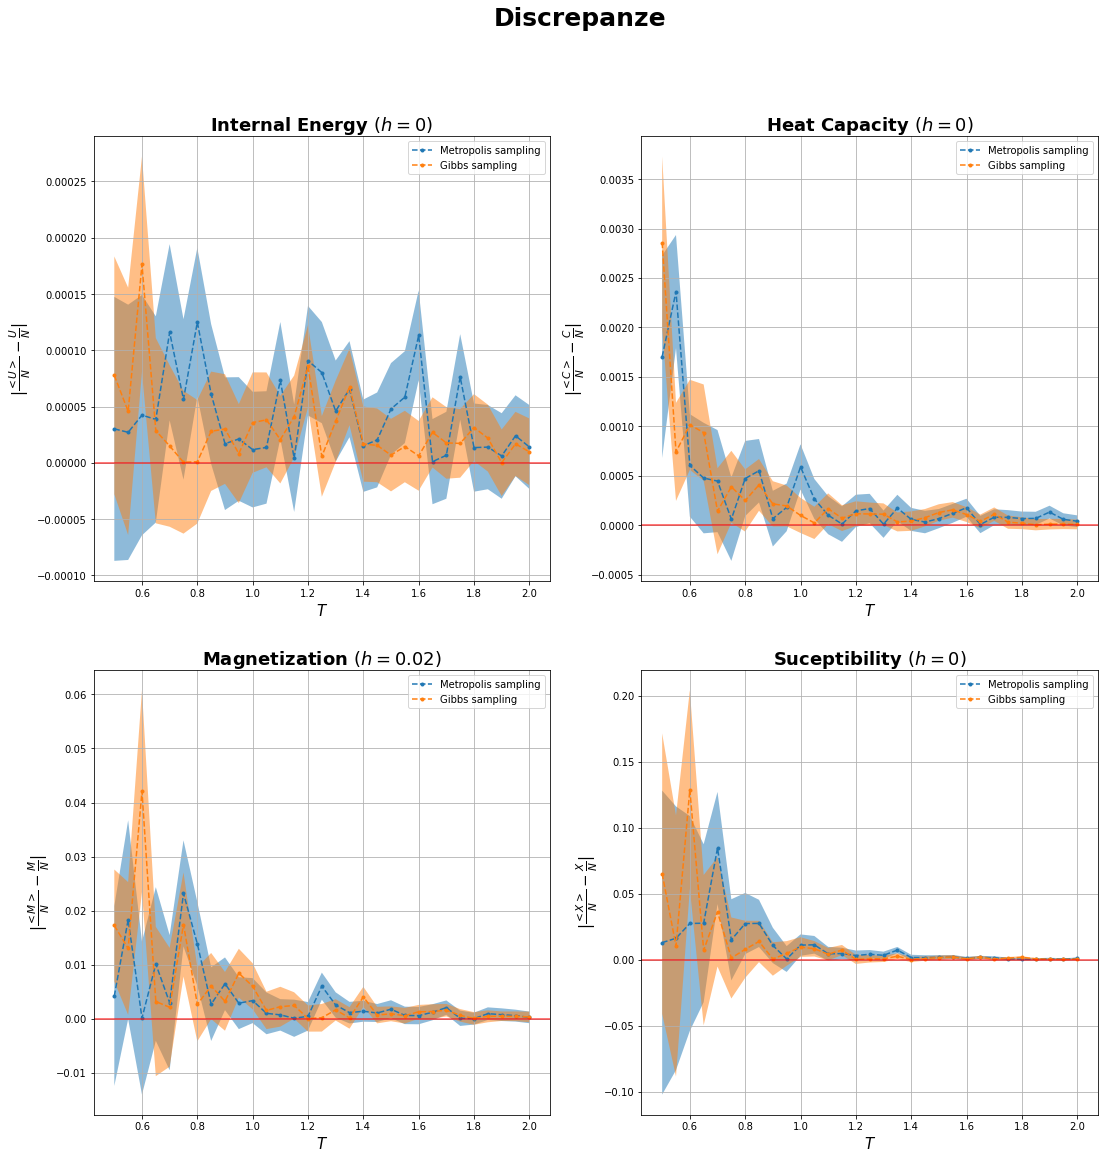

In [195]:
#THERORICAL OBSERVABLES
points=31
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#energy
e = -J*( th + ch*thN )/( 1 + thN )

#heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#susceptibility
x = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#magnetization
h=0.02 #external field
b=1./T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
m = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


y_labels=[r'$|\frac{<U>}{N}-\frac{U}{N}|$',r'|$\frac{<C>}{N}-\frac{C}{N}|$',r'$|\frac{<M>}{N}-\frac{M}{N}|$',r'$|\frac{<X>}{N}-\frac{X}{N}|$']
titles=[r'Internal Energy $(h=0)$', r'Heat Capacity $(h=0)$', r'Magnetization $(h=0.02)$', r'Suceptibility $(h=0)$']
theoricals=[e,heat,m,x]

fig, axes=plt.subplots(2, 2, figsize=(18,18))
fig.suptitle('Discrepanze', fontsize=25, fontweight='bold')
for i in range(2):
    for j in range(2):
        ax=axes[i][j]
        
        if(i==1): k=j+1
        else:k=j
        diff=np.abs(measures_m[i+k]-theoricals[i+k])
        ax.plot(T_m,diff,'.--', label='Metropolis sampling')
        ax.fill_between(T_m,diff-errors_m[i+k],diff+errors_m[i+k], alpha=0.5)

        diff=np.abs(measures_g[i+k]-theoricals[i+k])
        ax.plot(T_g,diff,'.--', label='Gibbs sampling')
        ax.fill_between(T_g,diff-errors_g[i+k],diff+errors_g[i+k], alpha=0.5)

        ax.legend()
        ax.set_title(titles[i+k], fontsize=18, fontweight='bold')
        ax.set_xlabel(r'$T$', fontsize=15)
        ax.set_ylabel(y_labels[i+k], fontsize=15)
        ax.axhline(0, color='red', alpha=0.7)
        ax.grid(True)
plt.show()

Si osserva che i risultsti ottenuto sono in ottimo accordo con i dati teorici.